# **Importing Modules**

---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import cv2

# **Loading Images**

---



In [ ]:
images, labels = list(),list()
cls = 43

dir_path = "Downloads/traffic_sign_training/"
all_folders = list(os.listdir(dir_path))
all_folders.sort()

for i in range(1,cls+1):

    folder = dir_path + all_folders[i] + "/"

    img_folder = list(os.listdir(folder))
    img_folder.sort()

    for j in range(len(img_folder)-1):

        img_path = folder + img_folder[j]

        image = cv2.imread(img_path)
        image = cv2.resize(image, (32,32))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = np.array(image)
        images.append(image)

        label = np.zeros(cls)
        label[i-1]=1
        labels.append(label)

print("Loading Images Completed")

Loading Images Completed


In [ ]:
print("Total Number of Images:",len(images))

Total Number of Images: 26640


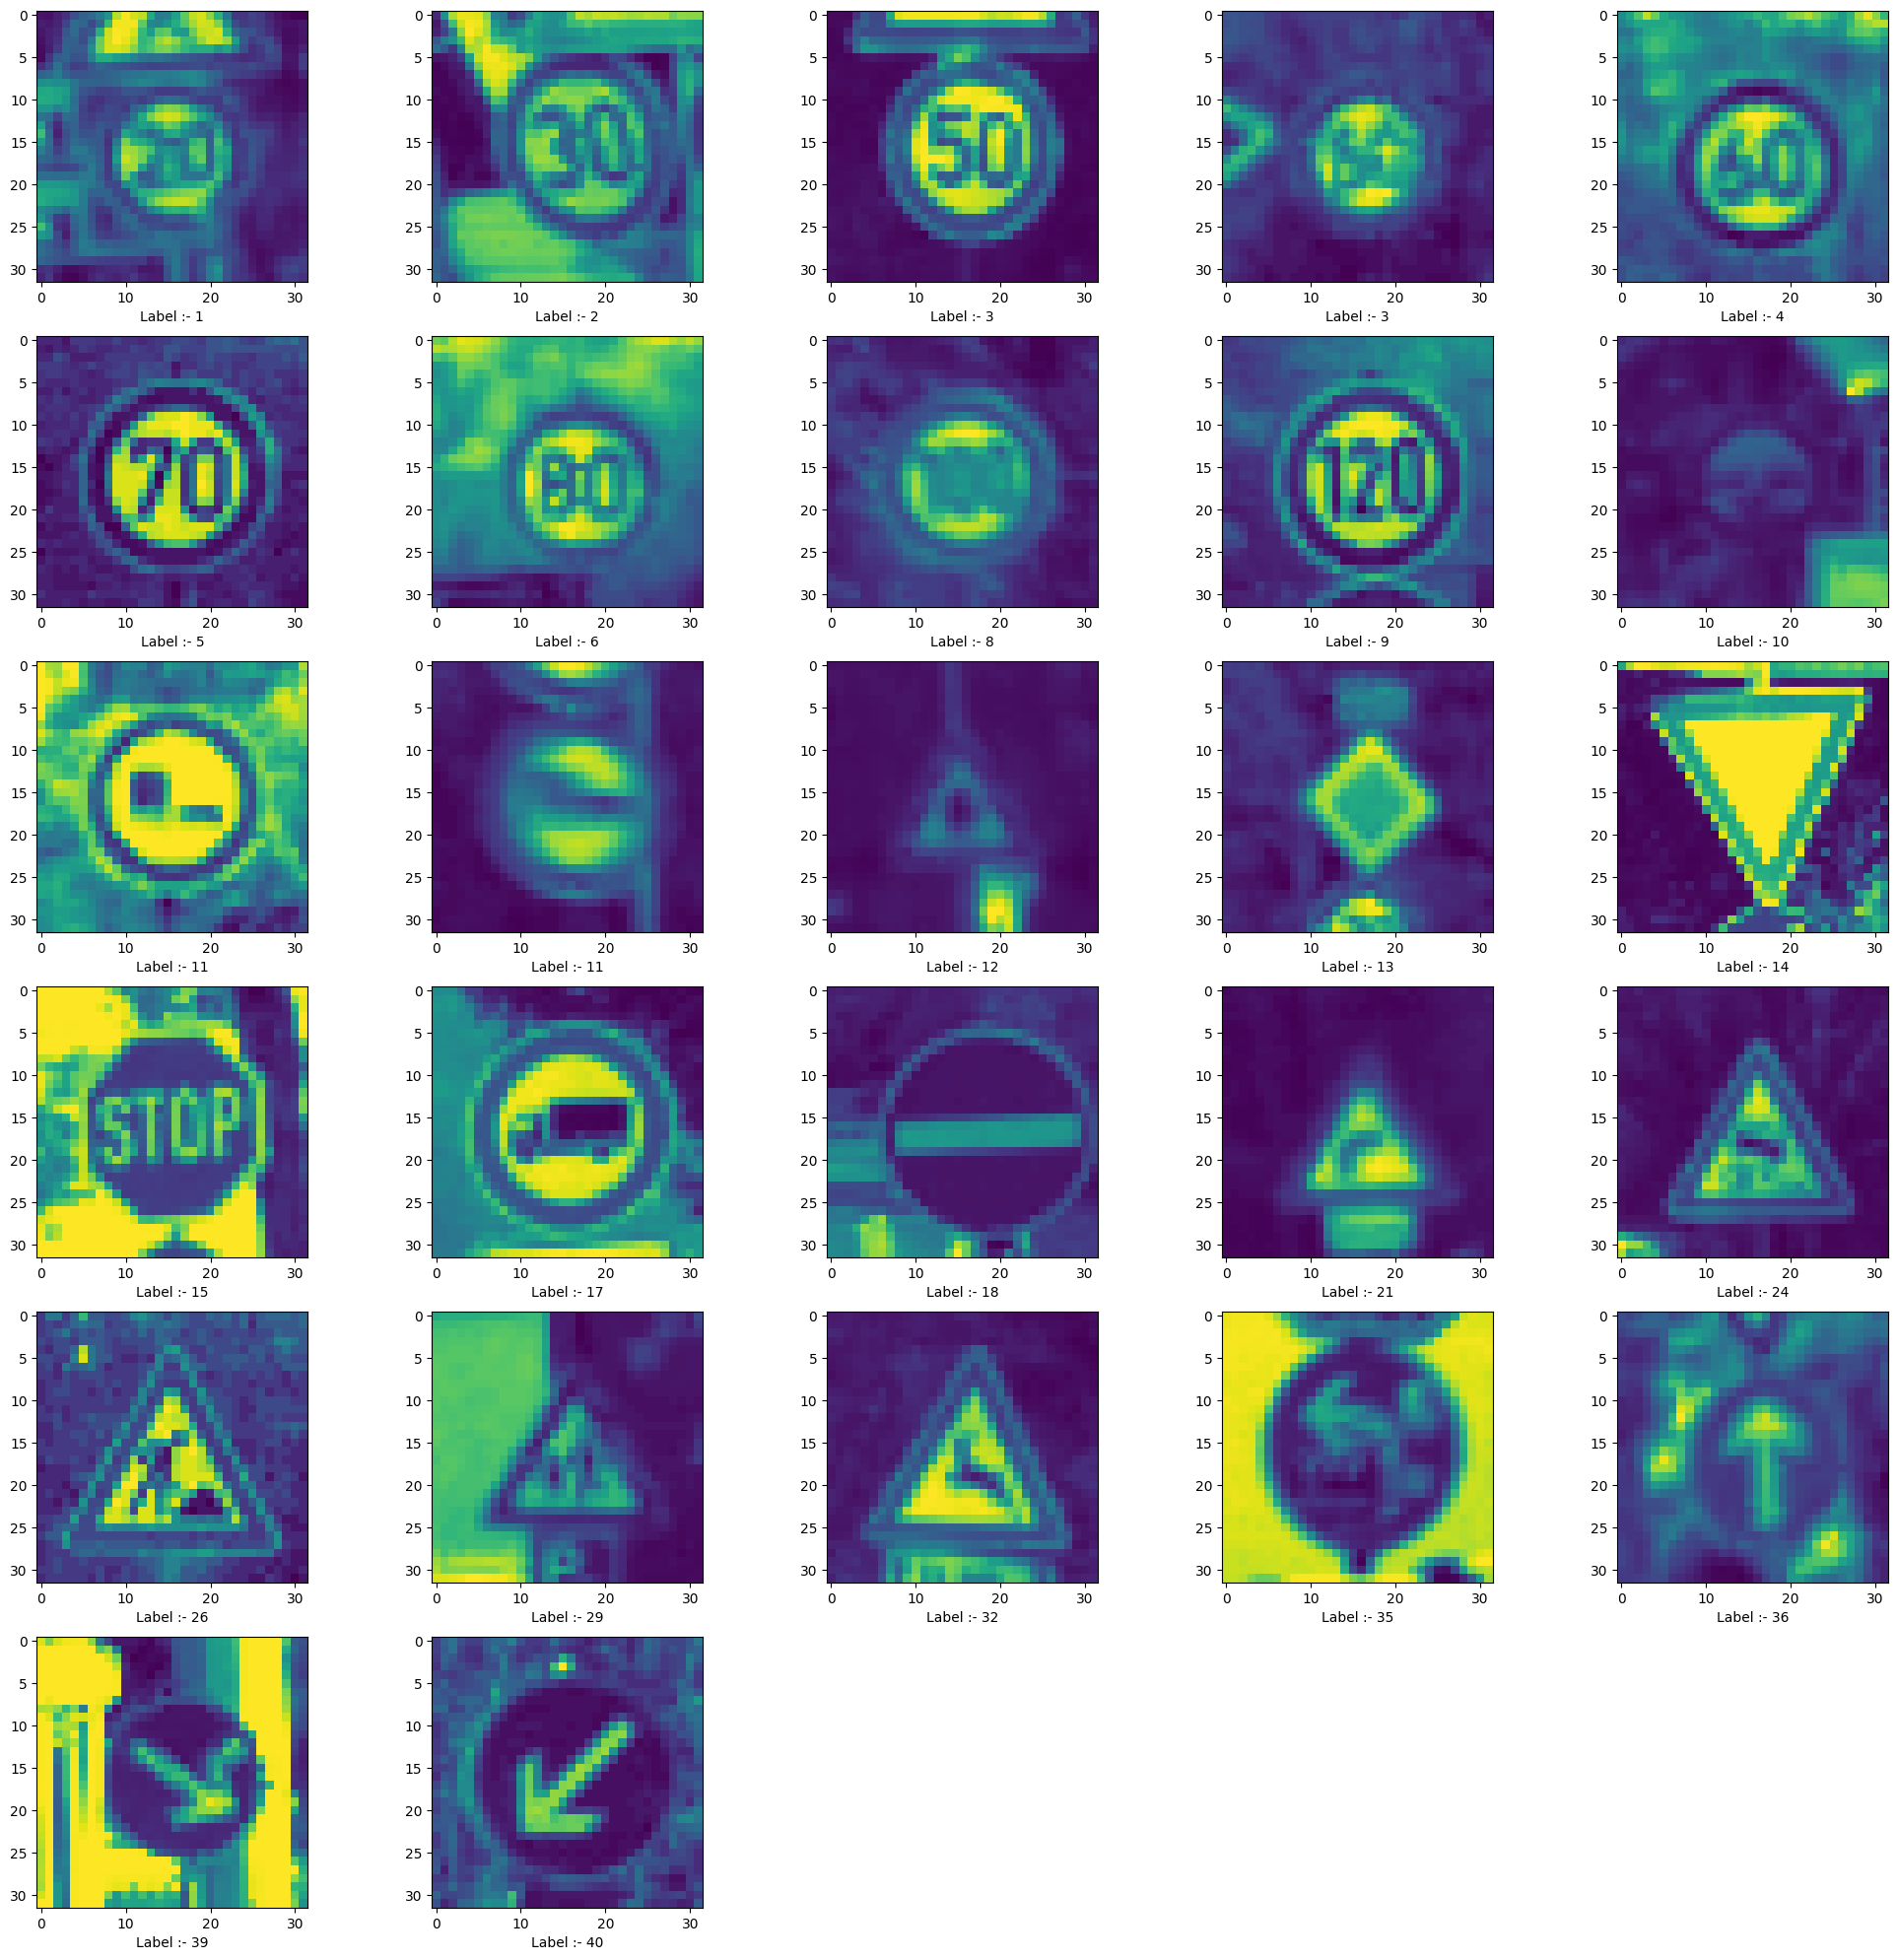

In [ ]:
plt.figure(figsize=(25, 25))
cnt=1
for i in range(0, len(images), 1000):
    plt.subplot(6, 5, cnt)

    plt.imshow(images[i])
    plt.xlabel( "Label :- " + str(np.where(labels[i]==1)[0][0] + 1))

    cnt = cnt+1

# **Preparing Data for Training**

---



In [ ]:
images = np.array(images)
images = images/255
print('Images shape : ', images.shape)

labels = np.array(labels)
print('Labels shape : ', labels.shape)

Images shape :  (26640, 32, 32)
Labels shape :  (26640, 43)


In [ ]:
X = images.astype(np.float32)
y = labels.astype(np.float32)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Shape of X_train : ", X_train.shape)
print("Shape of X_test  : ", X_test.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of y_test  : ", y_test.shape)

Shape of X_train :  (21312, 32, 32)
Shape of X_test  :  (5328, 32, 32)
Shape of y_train :  (21312, 43)
Shape of y_test  :  (5328, 43)


# **Training the Model**

---



In [ ]:
import keras
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, Rescaling, AveragePooling2D, Dropout

In [ ]:
model = Sequential()

model.add(Rescaling( 1, input_shape = (32,32,1)))
model.add(Conv2D( 6, kernel_size = (5,5), activation = "relu"))
model.add(AveragePooling2D( pool_size = (2,2)))

model.add(Conv2D( 16, kernel_size = (5,5), activation = "relu"))
model.add(AveragePooling2D( pool_size = (2,2)))

model.add(Conv2D( 120, kernel_size = (5,5), activation = "relu"))
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(120, activation = "relu"))
model.add(Dense(43, activation = "softmax"))

In [ ]:
model.compile(loss = keras.metrics.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ["accuracy"])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 32, 32, 1)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_4 (Avera  (None, 14, 14, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_5 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_7 (Conv2D)           (None, 1, 1, 120)        

In [ ]:
history = model.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test))

Epoch 1/50
666/666 [==============================] - 3s 5ms/step - loss: 2.1107 - accuracy: 0.4124 - val_loss: 0.8650 - val_accuracy: 0.7260
Epoch 2/50
666/666 [==============================] - 3s 5ms/step - loss: 0.8163 - accuracy: 0.7553 - val_loss: 0.5219 - val_accuracy: 0.8502
Epoch 3/50
666/666 [==============================] - 3s 4ms/step - loss: 0.5710 - accuracy: 0.8305 - val_loss: 0.3891 - val_accuracy: 0.8955
Epoch 4/50
666/666 [==============================] - 3s 4ms/step - loss: 0.4558 - accuracy: 0.8640 - val_loss: 0.3042 - val_accuracy: 0.9187
Epoch 5/50
666/666 [==============================] - 3s 5ms/step - loss: 0.3561 - accuracy: 0.8973 - val_loss: 0.2501 - val_accuracy: 0.9328
Epoch 6/50
666/666 [==============================] - 3s 4ms/step - loss: 0.3020 - accuracy: 0.9095 - val_loss: 0.2019 - val_accuracy: 0.9469
Epoch 7/50
666/666 [==============================] - 3s 4ms/step - loss: 0.2560 - accuracy: 0.9220 - val_loss: 0.1799 - val_accuracy: 0.9505
Epoch 

In [ ]:
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=2)

print('Validation accuracy :', val_acc)
print('Validation loss     :', val_loss)

167/167 - 0s - loss: 0.0481 - accuracy: 0.9916 - 291ms/epoch - 2ms/step
Validation accuracy : 0.9915540814399719
Validation loss     : 0.04810742288827896


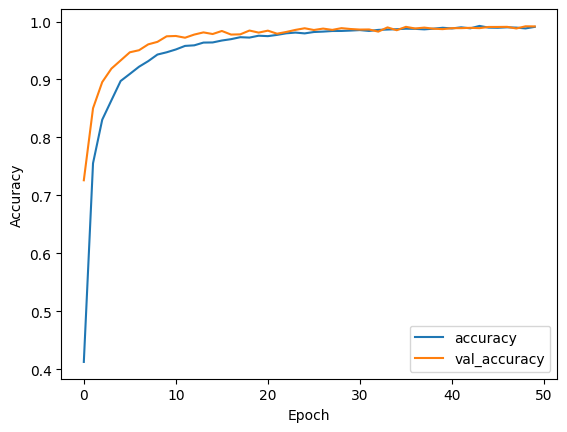

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

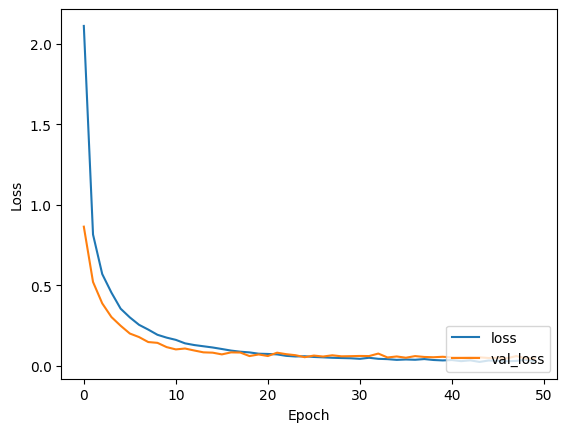

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

# **Predictions**

---



In [ ]:
y_preds = model.predict(X_test)

167/167 [==============================] - 0s 2ms/step


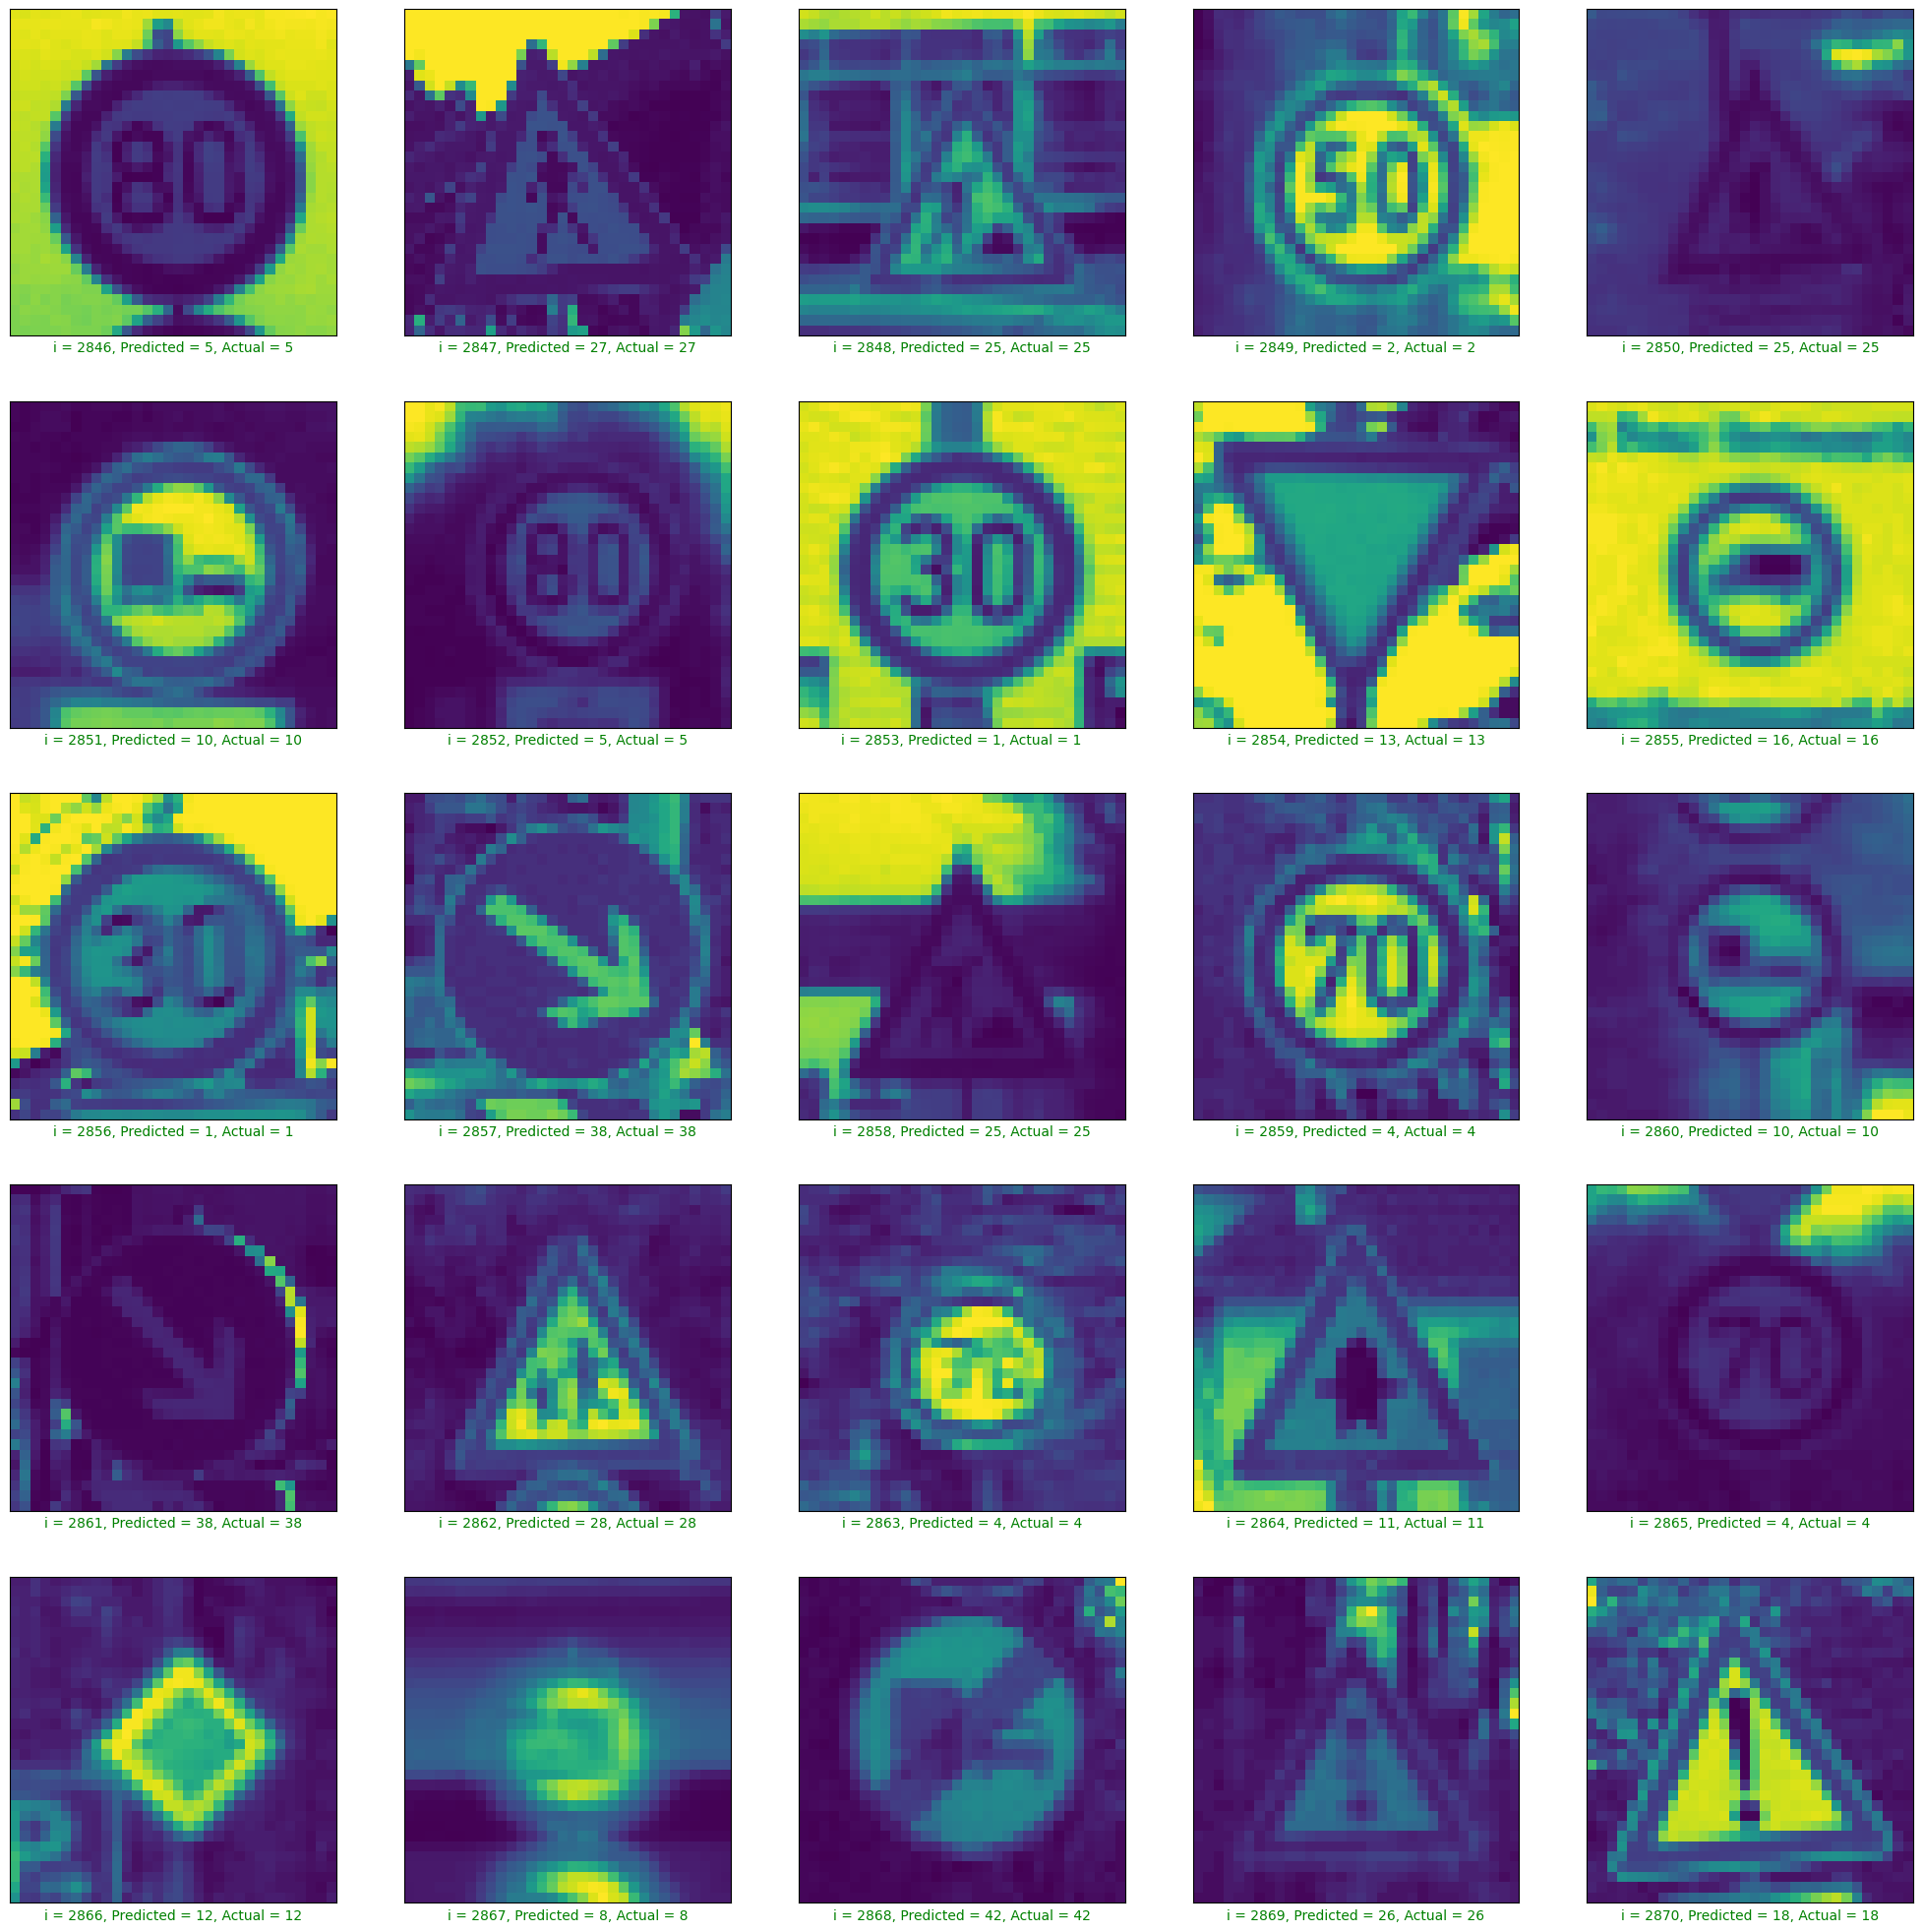

In [ ]:
plt.figure(figsize=(25, 25))
start_index = random.randint(0, 5000)
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    y_pred = np.argmax(y_preds[start_index+i])
    gt = np.argmax(y_test[start_index+i])

    col = "g"
    if y_pred != gt:
        col = "r"

    plt.xlabel("i = {}, Predicted = {}, Actual = {}".format(start_index+i, y_pred, gt), color=col)
    plt.imshow(X_test[start_index+i])

In [ ]:
model.save("Downloads/Traffic_Signal_Prediction/Keras_Model/")

INFO:tensorflow:Assets written to: Downloads/Traffic_Signal_Prediction/Keras_Model/assets


INFO:tensorflow:Assets written to: Downloads/Traffic_Signal_Prediction/Keras_Model/assets


In [ ]:
import pickle
pickle.dump("traffic_signal_classifier.pkl","wb")